# **TASK2 - Data Science and Business Analytics**

# **Author: Jaya Dutt Saxena**

# **GRIP @ The Sparks Foundaton**

# **#GRIPSEPT22 #GRIPSEPTEMBER22**

# **#datascience**

# **Importing necessary libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.cluster import KMeans

# **Loading the iris dataset**

In [ ]:
iris = datasets.load_iris()

# Constructing DataFrame from loaded iris dataset
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

# Retrieving first 10 values from DataFrame
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


# **Ascertaining more information about the DataFrame.**

In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# **Clustering the Data**
# **Identifying Optimum Number of Clusters - Elbow Plot**

**Now I've set the range of values from 1 to 10 for identifying the optimum number of clusters using KMeans Clustering Algorithm**

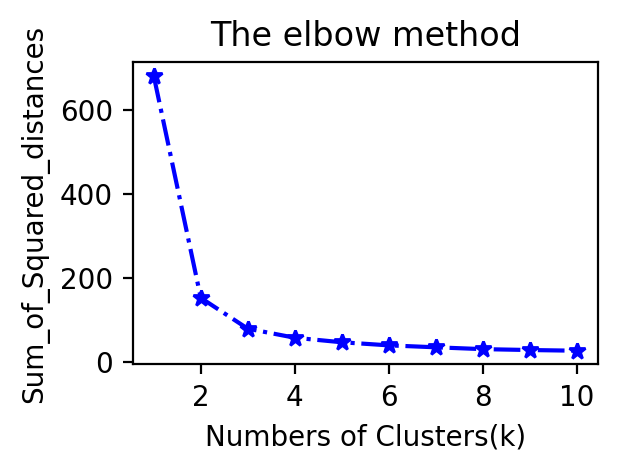

In [ ]:
iris_df = iris_df.iloc[:,:].values

Sum_of_Squared_distances = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(iris_df)
    Sum_of_Squared_distances.append(kmeans.inertia_)
    
# Plotting the inertia values with values of K
plt.figure(figsize=(3,2), dpi=200)
plt.plot(range(1, 11), Sum_of_Squared_distances, 'b*-.')
plt.title('The elbow method')
plt.xlabel('Numbers of Clusters(k)')
plt.ylabel('Sum_of_Squared_distances')
plt.show()

**In the plot above, we can see that the inertia (sum of the squared distances to the nearest cluster center) decreases as we increase the number of clusters. We can see that there is a big change in inertia and slope from 2 clusters onwards.**

# **Applying K Means Clustering Algorithm**

**So now I've initialized the KMeans Clustering Algorithm and set the number of clusters or the k value to 3. Then to apply this to data I simply called the kmeans.fit and passed in the dataframe and saved it in y_kmeans variable..**

In [ ]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(iris_df)


# **Plotting K-Means Clustering Results on a Scatter Plot**

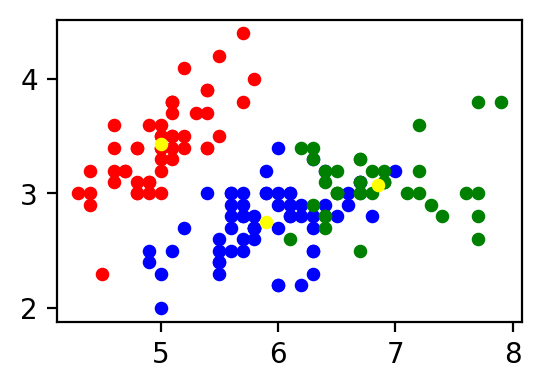

In [ ]:
plt.figure(figsize=(3,2), dpi=200)
plt.scatter(iris_df[y_kmeans == 0, 0], iris_df[y_kmeans == 0, 1],
            s = 15, c = 'red', label = 'Iris-setosa')
plt.scatter(iris_df[y_kmeans == 1, 0], iris_df[y_kmeans == 1, 1], 
            s = 15, c = 'blue', label = 'Iris-versicolour')
plt.scatter(iris_df[y_kmeans == 2, 0], iris_df[y_kmeans == 2, 1],
            s = 15, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 15, c = 'yellow', label = 'Centroids')

plt.show()

# **Thank You**